# Exercise 1.2)

In [73]:
# Setup and load data

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [74]:
# Load the dataset

df = pd.read_csv("data.csv")


In [75]:
# Exploaratoy Data Analysis(EDA)

# Dataset strcuture

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [76]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [77]:
# Check missing values

df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

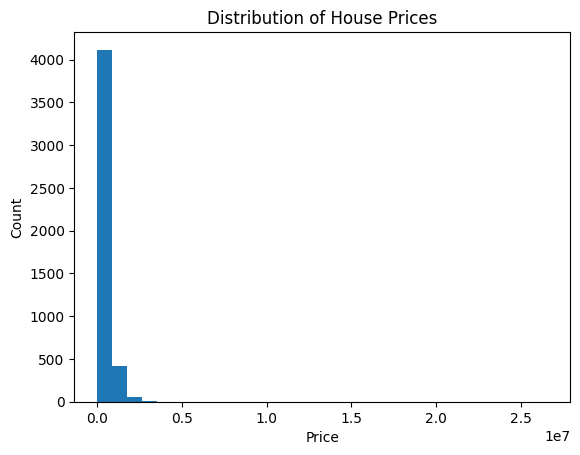

In [78]:
# Distribution of target variable

plt.figure()
plt.hist(df["price"], bins=30)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()


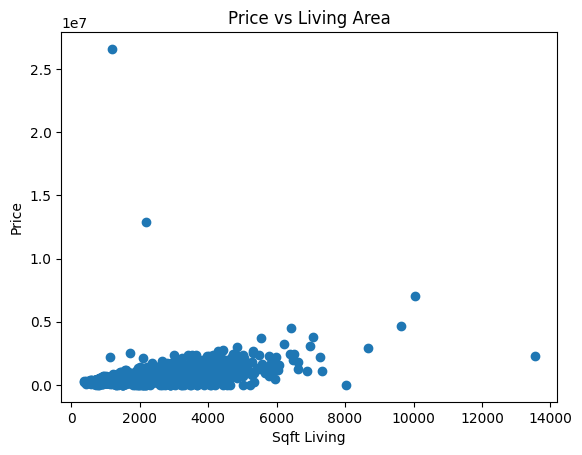

In [79]:
# Price vs living area

plt.figure()
plt.scatter(df["sqft_living"], df["price"])
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("Price vs Living Area")
plt.show()


In [80]:
# Drop categorical and date columns

# Identify categorical columns

df.select_dtypes(include="object").columns


Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [81]:
# Drop date column

df = df.drop(columns=["date"])




In [82]:
# Verify remaining columns

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 611

In [83]:
# Prepare X and y

y = df["price"]


In [84]:
# Define feature matrix

X = df.drop(columns=["price"])


In [85]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [86]:
# Check shapes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3680, 16)
(920, 16)
(3680,)
(920,)


In [87]:
# Create evaluation function

# Define function

def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return mae, mse, rmse


In [88]:
# Linear Regression

# Create model

lin_reg = LinearRegression()


In [89]:
# Evaluate model  ??????

lr_mae, lr_mse, lr_rmse = evaluate_model(
    X_train, X_test, y_train, y_test, lin_reg
)


ValueError: could not convert string to float: '18630 NE 202nd St'

In [ ]:
# Ridge Regression (RidgeCV)

alphas = np.logspace(-3, 3, 20)




In [ ]:
# Create RidgeCV model

ridge = RidgeCV(alphas=alphas)


In [ ]:
# Evaluate Ridge  ?????

ridge_mae, ridge_mse, ridge_rmse = evaluate_model(
    X_train, X_test, y_train, y_test, ridge
)


In [ ]:
# ElasticNet Regression (ElasticNetCV)

# Create ElasticNetCV model

elastic = ElasticNetCV(
    alphas=alphas,
    l1_ratio=[0.1, 0.5, 0.9],
    cv=5,
    random_state=42
)



In [ ]:
# Evaluate ElasticNet

enet_mae, enet_mse, enet_rmse = evaluate_model(
    X_train, X_test, y_train, y_test, elastic
)





In [ ]:
# Compare models in a dataframe     ???????

# Create results dataframe

results = pd.DataFrame({
    "model": ["LinearRegression", "RidgeCV", "ElasticNetCV"],
    "mae": [lr_mae, ridge_mae, enet_mae],
    "mse": [lr_mse, ridge_mse, enet_mse],
    "rmse": [lr_rmse, ridge_rmse, enet_rmse]
})


In [ ]:
# Display results

results
